
# people：語料庫
* 語料庫指依特定目的蒐集的語彙。例如我們就蒐集了"黨國幹部","歷史人物","官職","反革命","政治理想","貶抑詞","褒獎詞","會議","文藝學者","革命楷模","政策作為"等的語料庫。
* 計算文本中含有這些語料的多寡，可以快速瞭解這些文本的性質。不同年度的文本也可以進行比較。
* 也可以鎖定某個關鍵詞作為標的，檢查與他共同出現的語料，此即詞對分析，前章已有提及。
* 因為要計算語詞彙的數量，所以語料庫內的字詞要精簡、不能太長，一些修飾性的贅語要刪除，否則累計次數會失真，當然語料庫要務求完整，以有意義。

In [1]:
from collections import Counter
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

# 中文設定1: 楷體字
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

# 讀取語料庫, list

In [2]:
path="d:/My python/people/"
corpus_list=["革命楷模","歷史人物","黨國幹部","文藝學者","官職","會議","政策目標","政策作為","政策議題","貶抑詞","反革命","鬥爭","歌功頌德","效忠黨國",
             "褒獎詞","道德","學習","科學","台湾"]
corpus=[]
for c in corpus_list:
    string="open(path" +"+"+ "'corpus/"+c+".txt'"+",'r',encoding='utf-8').read().split()"
    corpus.append(eval(string))


# 語料庫內容

In [3]:
# 選用語料庫，另外歷史事件，
len(corpus)

19

In [4]:
n=0
print (corpus_list[n],corpus[n])

革命楷模 ['万廷文', '久美拉杰', '马万水', '马永顺', '马志祥', '马宝玉', '马俊欣', '马恩华', '马海德', '孔胜东', '孔繁森', '文花枝', '王万青', '王大宾', '王小谟', '王乐义', '王兰英', '王玉坤', '王长富', '王兆兰', '王光国', '王收秋', '王启民', '王廷江', '王国藩', '王杰', '王进喜', '王顺友', '王振堂', '王桂兰', '王曼利', '王滚林', '丛飞', '包起帆', '史来贺', '史砚虹', '叶如陵', '叶欣', '玉荣', '甘远志', '田守诚', '田沛发', '申纪兰', '白芳礼', '邓练贤', '邓前堆', '邓建军', '邓稼先', '龙梅', '龙清秀', '任长霞', '关龙友', '刘天奎', '刘文学', '刘廷佑', '刘秀珍', '刘运库', '刘胡兰', '刘英俊', '刘维红', '向秀丽', '吕士才', '吕鸿宾', '孙茂芳', '安业民', '年四旺', '朱玉林', '朱伯儒', '朱国萍', '朱彦夫', '朱显发', '次仁多吉', '江竹筠', '许月华', '何大庆', '何桂琴', '吴元明', '吴天祥', '吴运铎', '吴金印', '吴登云', '宋彬彬', '张华', '张克来', '张克勤', '张志全', '张良忠', '张秉贵', '张保英', '张思德', '张荣锁', '张海迪', '时传祥', '李元龙', '李凤恩', '李双良', '李文祥', '李方洪', '李永庆', '李兆麟', '李向群', '李国安', '李延章', '李林', '李春燕', '李顺达', '李桂林', '李润虎', '李素丽', '李梦桃', '李耀先', '杜凤瑞', '杜洪英', '杨怀远', '杨春', '杨苗苗', '杨根思', '杨斌圣', '杨道根', '谷文昌', '阮啸仙', '麦贤得', '周天才', '周光裕', '孟二冬', '孟泰', '林巧稚', '林秀贞', '林浩', '欧阳海', '武侯梨', '罗天山', '罗玮', '罗映珍', '罗健夫', '罗盛教', '邰丽华', '邱少云', '邱娥国', '邵春亮', '陆兰军', '陆建芬', '陈文达', '陈

# 篩選出歷年提及鄧小平的報導

In [5]:
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["邓小平"]
title="邓小平"
field="token"
unit="sent"

In [6]:
import people


    函數列表
    jieba 資料選取
        doc_select(year, path, title, kw, field, unit)  return df, df_year
        print_doc_select_random(df,num,title,field)
        plot_doc_select_by_year(df_year,cat)
        read_doc_select(path, unit, field, title)  return df
        read_doc_select_by_year(path, unit, field, title)  return df_by_year
        read_doc_select_pkl(path, unit, field,title)  return df
        print_filename(filenames, field)
    主題分析
        topic model(doc_list,num_i, method)  return df_topic, df, df_lsa
        plot_topic_model_trend(year, df_lsa,topics, num_i)   return ts
        plot_topic_model_pei(topics, ts)
        plot_topic_model_bar(topics,size)
    其他
    


In [8]:
res=people.doc_select(year, path, title, kw, field, unit)

1946 done 22 117260 0.0001876172607879925
1947 done 27 239468 0.00011274992900930396
1948 done 21 201284 0.00010433020011526003
1949 done 48 505117 9.502748868084028e-05
1950 done 51 621218 8.209678405970207e-05
1951 done 19 559504 3.3958649089193285e-05
1952 done 43 417450 0.0001030063480656366
1953 done 85 521586 0.00016296449674646176
1954 done 148 505159 0.0002929770626673978
1955 done 96 593132 0.0001618526736038521
1956 done 240 783982 0.00030612947746249276
1957 done 202 968678 0.00020853162764097047
1958 done 130 980682 0.00013256080972221372
1959 done 149 991154 0.00015032981756619052
1960 done 151 977345 0.00015450020207807887
1961 done 223 797292 0.0002796967735785634
1962 done 101 611632 0.00016513197478222198
1963 done 255 616087 0.0004139025819405376
1964 done 327 668885 0.0004888732741801655
1965 done 331 667432 0.0004959306715890158
1966 done 171 549394 0.0003112520340593454
1967 done 0 420647 0.0
1968 done 0 402227 0.0
1969 done 0 415745 0.0
1970 done 0 462764 0.0
1971

In [9]:
df=res[0]

In [10]:
df

,year,filename,title,token
0,1946,人民日報_19460517_1_4274,把悲痛变为力量，与人民密切结合！,邓小平 同志 四月 二十一日 在 党内 干部 追悼 王若飞 同志 等 殉难 的 会上 的 报告
1,1946,人民日報_19460518_1_1971,刘伯承将军等电慰坚守四平街英雄昌图东北我克报台山四平街战事无变化,刘伯承 邓小平 薄一波 张际春 王宏坤 李达 五月 十五日 于 邯郸
2,1946,人民日報_19460610_1_4570,电慰海城起义官兵朱总司令、刘邓二将军,军区司令员 刘伯承 将军 ， 政委 邓小平 将军 ， 顷 代表 全军 ， 电贺 潘朔端 将...
3,1946,人民日報_19460610_1_4570,电慰海城起义官兵朱总司令、刘邓二将军,刘伯承 邓小平 六月 八日
4,1946,人民日報_19460613_1_845,各解放区纷纷电慰潘师,晋冀鲁豫军区司令员 刘伯承 将军 政委 邓小平 将军 曾 代表 全军 电贺 （ 文略 ， ...
...,...,...,...,...
90085,2012,人民日報_20120103_2_20570,肝胆相照创伟业 凝心聚力谱华章,我们 要 更加 紧密 地 团结 在 以 胡锦涛 同志 为 总书记 的 中共中央 周围 ， ...
90086,2012,人民日報_20120102_1_20594,全国政协举行新年茶话会,我们 要 高举 中国特色社会主义 伟大旗帜 ， 全面 贯彻 党 的 十七大 和 十七届 三...
90087,2012,人民日報_20120102_2_20598,在全国政协新年茶话会上的讲话,我们 要 高举 中国特色社会主义 伟大旗帜 ， 全面 贯彻 党 的 十七大 和 十七届 三...
90088,2012,人民日報_20120101_1_20622,共同促进世界和平与发展,在 新 的 一年 里 ， 我们 将 高举 中国特色社会主义 伟大旗帜 ， 以 邓小平理论 ...


In [11]:
people.function_list()


    函數列表
    jieba 資料選取
        doc_select(year, path, title, kw, field, unit)  return df, df_year
        print_doc_select_random(df,num,title,field)
        plot_doc_select_by_year(df_year,cat)
        read_doc_select(path, unit, field, title)  return df
        read_doc_select_by_year(path, unit, field, title)  return df_by_year
        read_doc_select_pkl(path, unit, field,title)  return df
        print_filename(filenames, field)
    主題分析
        topic model(doc_list,num_i, method)  return df_topic, df, df_lsa
        plot_topic_model_trend(year, df_lsa,topics, num_i)   return ts
        plot_topic_model_pei(topics, ts)
        plot_topic_model_bar(topics,size)
    其他
    


In [12]:
df_year=people.read_doc_select_by_year(path, unit, field, title)

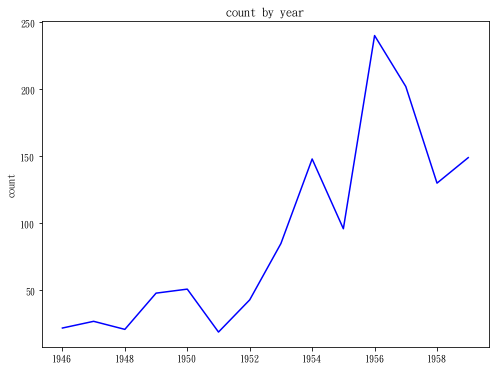

In [13]:
cat="count"
people.plot_doc_select_by_year(df_year,cat)

## 一年合併成一個文字檔，以年作為分析單位

In [14]:
import re
tokens=[]
years=[]
target=[]
for n in range(len(year)):
    str_year=''
    i=0
    df1=df[(df.year==year[n])]     
    # 文章 list
    token=list(df1.token)  
    for t in range(len(token)):
        if type(token[t])== str:   
            str_year+="。"+token[t]                                                                             
            i+=1                             
    tokens.append(str_year)      
    years.append(year[n])
    target.append(i)
    print (years[n],"done",i,"found")    

1946 done 22 found
1947 done 27 found
1948 done 21 found
1949 done 48 found
1950 done 51 found
1951 done 19 found
1952 done 43 found
1953 done 85 found
1954 done 148 found
1955 done 96 found
1956 done 240 found
1957 done 202 found
1958 done 130 found
1959 done 149 found
1960 done 151 found
1961 done 223 found
1962 done 101 found
1963 done 255 found
1964 done 327 found
1965 done 331 found
1966 done 171 found
1967 done 0 found
1968 done 0 found
1969 done 0 found
1970 done 0 found
1971 done 0 found
1972 done 0 found
1973 done 353 found
1974 done 788 found
1975 done 911 found
1976 done 9898 found
1977 done 552 found
1978 done 1565 found
1979 done 1174 found
1980 done 864 found
1981 done 676 found
1982 done 812 found
1983 done 1908 found
1984 done 1289 found
1985 done 1190 found
1986 done 943 found
1987 done 1432 found
1988 done 866 found
1989 done 1971 found
1990 done 1014 found
1991 done 417 found
1992 done 495 found
1993 done 3090 found
1994 done 3794 found
1995 done 2563 found
1996 done

In [15]:
data=list(zip(years, target,tokens))
df_year=pd.DataFrame(data, columns=["year","target","tokens"])          

In [16]:
df_year

,year,target,tokens
0,1946,22,。 邓小平 同志 四月 二十一日 在 党内 干部 追悼 王若飞 同志 等 殉难 的 会上 的...
1,1947,27,。 邓小平 敬题。 沙河县 北掌村 全村 群众 并 派 代表 把 斗争 果实 中 两件 最好...
2,1948,21,。刘伯承 邓小平 两 将军 ， 闻悉 黄龙 山区 及 宜川 大捷 ， 率 前线 全体 指战员...
3,1949,48,。 刘伯承 陈毅 邓小平 饶漱石 张云逸 粟裕 谭震林 陈赓 诸 同志 ， 华东 人民解放军...
4,1950,51,。 第一 野战军 彭德怀 贺龙 习仲勋 张宗逊 赵寿山 诸 同志 ， 第二 野战军 刘伯承 ...
...,...,...,...
62,2008,1927,。 中共中央总书记 国家主席 中央军委主席 胡锦涛 在 会上 发表 重要讲话 ， 强调 要 ...
63,2009,1597,。 《 管理 规定 》 是 中央 企业 领导人员 管理 的 基本 规章 ， 坚持 以 邓小平...
64,2010,987,。 《 规定 》 以 马克思列宁主义 毛泽东思想 邓小平理论 和 “ 三个代表 ” 重要 思...
65,2011,1757,。 会议 指出 ， ２ ０ １ ２ 年 党风廉政 建设 和 反腐败 工作 总 的 要求 是 ...


## save and read

In [17]:
# save excel files
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+title+"_sent_tokens_year.xlsx"
writer = pd.ExcelWriter(fname)
df_year.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [18]:
###################################################
import pandas as pd
pth="D:/my python/people/working/" 
fname=pth+title+"_sent_tokens_year.xlsx"
df_year=pd.read_excel(fname, 0)
df_year

,Unnamed: 0,year,target,tokens
0,0,1946,22,。 邓小平 同志 四月 二十一日 在 党内 干部 追悼 王若飞 同志 等 殉难 的 会上 的...
1,1,1947,27,。 邓小平 敬题。 沙河县 北掌村 全村 群众 并 派 代表 把 斗争 果实 中 两件 最好...
2,2,1948,21,。刘伯承 邓小平 两 将军 ， 闻悉 黄龙 山区 及 宜川 大捷 ， 率 前线 全体 指战员...
3,3,1949,48,。 刘伯承 陈毅 邓小平 饶漱石 张云逸 粟裕 谭震林 陈赓 诸 同志 ， 华东 人民解放军...
4,4,1950,51,。 第一 野战军 彭德怀 贺龙 习仲勋 张宗逊 赵寿山 诸 同志 ， 第二 野战军 刘伯承 ...
...,...,...,...,...
62,62,2008,1927,。 中共中央总书记 国家主席 中央军委主席 胡锦涛 在 会上 发表 重要讲话 ， 强调 要 ...
63,63,2009,1597,。 《 管理 规定 》 是 中央 企业 领导人员 管理 的 基本 规章 ， 坚持 以 邓小平...
64,64,2010,987,。 《 规定 》 以 马克思列宁主义 毛泽东思想 邓小平理论 和 “ 三个代表 ” 重要 思...
65,65,2011,1757,。 会议 指出 ， ２ ０ １ ２ 年 党风廉政 建设 和 反腐败 工作 总 的 要求 是 ...


## 詞頻計算，分年度計算

In [19]:

word_count_years=[]
for n in range(len(year)):
    # 轉為 list
    if pd.isna(tokens[n])==False:
        tok=re.split(r'[。 ]',tokens[n])
        word_counts = Counter(tok)
        word_count_years.append(dict(word_counts.most_common()))    
    else:
        word_count_years.append(dict())
      

## 詞對計算，分年度計算
* 設定 window size

In [20]:
window=4
# 累計配對的次數
import re
pair_count_years=[]
bigrams_years=[]

for n in range(len(year)):    
    word_pair_count=Counter()
    word1=[]
    word2=[]
    num_bigrams=0
    if pd.isna(tokens[n])==False:
        tok=re.split(r'[。 ]',tokens[n])
        # i 是啟始位置
        for i in range(len(tok)-1):
            # j 是間隔 1 表下一個
            for j in range(1,window+1):  
                # 啟始加間隔，總共要小於總長度，因為從0起算
                if i+j < len(tok):  
                    # 詞對
                    (w1,w2)=tok[i],tok[i+j]
                    # 大於一個字方納入
                    if len(w1)>1 and len(w2)>1:
                        word_pair_count[(w1,w2)]+=1                  
                        num_bigrams += 1          
    bigrams_years.append(num_bigrams)                    
    pair_count_years.append(word_pair_count.most_common())   
    print (year[n],"done", num_bigrams)

1946 done 868
1947 done 1091
1948 done 816
1949 done 7207
1950 done 3885
1951 done 744
1952 done 5218
1953 done 8708
1954 done 18249
1955 done 7659
1956 done 14613
1957 done 9469
1958 done 6337
1959 done 6823
1960 done 6639
1961 done 9081
1962 done 4493
1963 done 12626
1964 done 14463
1965 done 16069
1966 done 9802
1967 done 0
1968 done 0
1969 done 0
1970 done 0
1971 done 0
1972 done 0
1973 done 19286
1974 done 32127
1975 done 37946
1976 done 442558
1977 done 23134
1978 done 59491
1979 done 43116
1980 done 29605
1981 done 21560
1982 done 24663
1983 done 66787
1984 done 39786
1985 done 34433
1986 done 28737
1987 done 46772
1988 done 29805
1989 done 80297
1990 done 37857
1991 done 17007
1992 done 24245
1993 done 142380
1994 done 177421
1995 done 138679
1996 done 151115
1997 done 429739
1998 done 301313
1999 done 185965
2000 done 139909
2001 done 137320
2002 done 135409
2003 done 121423
2004 done 259273
2005 done 124225
2006 done 150292
2007 done 164591
2008 done 139035
2009 done 106698
2

# 計算卡方值

In [21]:
# 計算卡方值
def chisquare(o11, o12, o21, o22):
    n = o11 + o12 + o21 + o22
    x_2 = (n * ((o11 * o22 - o12 * o21)**2)) / ((o11 + o12) * (o11 + o21) * (o12 + o22) * (o21 + o22)) 
    return x_2

pair_chi_squares_year=[]
for n in range(len(year)):
    pair_chi_squares = Counter()
    # 從詞對計算卡方值
    for (w1, w2), w1_w2_count in pair_count_years[n]:
        if w1 in kw or w2 in kw:
            # O12
            w1_only_count = word_count_years[n][w1] - w1_w2_count
            # O21
            w2_only_count = word_count_years[n][w2] - w1_w2_count
            # O22
            rest_count = bigrams_years[n] - w1_only_count - w2_only_count - w1_w2_count
            # O11= w1_w2_count
            pair_chi_squares[(w1, w2)] = chisquare(w1_w2_count, w1_only_count, w2_only_count, rest_count)
            pair_chi_squares[(w1, w2)] =pair_chi_squares[(w1, w2)]
    pair_chi_squares_year.append(pair_chi_squares.most_common())        

# 語料庫圖譜

In [22]:
target=df_year.target
count_total_year=[]
for n in range(len(year)):  
    count_total=[]
    if target[n]>0:        
        # target 是前面已計算的標的詞數目
        count_total.append(target[n])

        # 卡方值最高的 200個詞對 #######   
        temp=pair_chi_squares_year[n]
        if len(temp)>=200:
            k=100
        else:
            k=len(temp)
            
        word=[]        
        for m in range(k):
            if temp[m][0][0] in kw:
                word.append((temp[m][0][1],round(temp[m][1],0)))
            else:
                word.append((temp[m][0][0],round(temp[m][1],0)))                                       
        count_total.append(word)

        # 各年度 pair_count_years 轉為 dictionary
        dic=dict(pair_count_years[n])  
        # 每個 corpus 依序計算  
        for c in range(len(corpus)):     
            # w1 w2 其一為標的字詞
            for k in kw:
                word1=[]
                word2=[]
                num=[]
                for (w1, w2) in dic:
                    # 合於 corpus 條件者選取
                    if (w1 == k and w1!=w2 and w2 in corpus[c]) or (w2 == kw and w1!=w2 and w1 in corpus[c]):     
                        word1.append(w1)
                        word2.append(w2)
                        num.append(dic[(w1, w2)])        
                edges=list(zip(word1, word2, num))
                # dataframe
                dfs=pd.DataFrame(edges,columns=["word1","word2","num"])
                # 排序
                dfs=dfs.sort_values(by=['num'],ascending=False)
                
                # 取前 200 個 #######################
                dfs=dfs.iloc[:200]   

            # 詞對數目加入 corpus_count    
            temp=dfs.values.tolist()
            word=[]
            # 只顯示共現詞
            for m in range(len(temp)):
                if temp[m][0] in kw:
                    word.append((temp[m][1],temp[m][2]))
                else:
                    word.append((temp[m][0],temp[m][2]))                                       
            count_total.append(word)

    else:
        count_total.append(target[n])
        for k in range(len(corpus)):
            count_total.append(np.nan)
    
    # 各個年度計算   
    count_total_year.append(count_total)
    print (year[n],"done")

1946 done
1947 done
1948 done
1949 done
1950 done
1951 done
1952 done
1953 done
1954 done
1955 done
1956 done
1957 done
1958 done
1959 done
1960 done
1961 done
1962 done
1963 done
1964 done
1965 done
1966 done
1967 done
1968 done
1969 done
1970 done
1971 done
1972 done
1973 done
1974 done
1975 done
1976 done
1977 done
1978 done
1979 done
1980 done
1981 done
1982 done
1983 done
1984 done
1985 done
1986 done
1987 done
1988 done
1989 done
1990 done
1991 done
1992 done
1993 done
1994 done
1995 done
1996 done
1997 done
1998 done
1999 done
2000 done
2001 done
2002 done
2003 done
2004 done
2005 done
2006 done
2007 done
2008 done
2009 done
2010 done
2011 done
2012 done


In [23]:
df_corpus=pd.DataFrame(count_total_year,columns=["count","詞對"]+corpus_list,index=year)

In [24]:
df_corpus

,count,詞對,革命楷模,歷史人物,黨國幹部,文藝學者,官職,會議,政策目標,政策作為,...,貶抑詞,反革命,鬥爭,歌功頌德,效忠黨國,褒獎詞,道德,學習,科學,台湾
1946,22,"[(刘伯承, 787.0), (张际春, 208.0), (薄一波, 198.0), (滕代...",[],[],"[(张际春, 7), (薄一波, 6), (王宏坤, 5), (滕代远, 5), (李达, ...","[(李达, 2)]","[(政委, 6), (将军, 4), (代表, 2), (副政委, 2), (晋冀鲁豫军区司...",[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1947,27,"[(刘伯承, 932.0), (将军, 438.0), (所部, 278.0), (政治委员...",[],[],"[(徐向前, 5), (李先念, 5), (薄一波, 1), (张际春, 1), (李达, ...","[(李达, 1)]","[(将军, 16), (副政委, 3), (晋冀鲁豫军区司令员, 2), (政委, 1), ...",[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1948,21,"[(刘伯承, 697.0), (粟裕, 422.0), (李先念, 306.0), (陈毅,...",[],[],"[(粟裕, 11), (陈毅, 9), (李先念, 8), (邓子恢, 5), (谭震林, ...","[(粟裕, 11), (李达, 1)]","[(将军, 2), (政委, 2), (副政委, 1), (代表, 1)]",[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1949,48,"[(刘伯承, 3971.0), (张际春, 1828.0), (第二, 1457.0), (...",[],[],"[(张际春, 14), (陈叔通, 5), (沈钧儒, 5), (高崇民, 4), (沈雁冰...","[(沈钧儒, 5), (高崇民, 4), (沈雁冰, 4), (粟裕, 3), (李达, 3...","[(将军, 11), (政委, 2), (政治委员, 1)]","[(大会, 1)]",[],[],...,[],"[(国民党军, 1)]",[],[],[],[],[],[],[],[]
1950,51,"[(刘伯承, 1460.0), (贺龙, 505.0), (政治委员, 479.0), (张...",[],[],"[(张际春, 9), (刘文辉, 3), (王维舟, 3), (李达, 3), (陈叔通, ...","[(李达, 3), (刘文辉, 3), (沈钧儒, 2), (沈雁冰, 2), (熊克武, ...","[(副主席, 6), (将军, 4), (政委, 4), (副政委, 2), (委员, 2)...","[(会议, 1)]",[],[],...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,1927,"[(同志, 39454.0), (毛泽东, 6017.0), (南方, 3115.0), (...",[],[],"[(江泽民, 57), (胡锦涛, 8), (以后, 7), (陈云, 7), (张云逸, ...","[(关怀, 4), (贺龙, 2), (乌兰夫, 1)]","[(代表, 8), (副总理, 7), (总书记, 2), (主席, 2), (教授, 1)...","[(教育工作会议, 2), (十二大, 1), (大会, 1), (中共十一届三中全会, 1...","[(中国特色社会主义, 8), (反腐倡廉, 8), (新中国, 2), (现代化建设, 2...",[],...,[],[],"[(无产阶级, 15)]","[(伟大, 3), (伟大实践, 2), (丰功伟绩, 2), (光辉思想, 1), (邓小...","[(党和国家, 6), (党中央, 1), (邓小平理论, 1)]","[(高瞻远瞩, 1), (精辟, 1), (光辉一生, 1)]","[(坚定, 2)]","[(解放思想, 5), (教育, 2)]",[],"[(一国两制, 6), (中华民族, 2), (和平统一, 1), (一个中国, 1), (..."
2009,1597,"[(同志, 27549.0), (毛泽东, 6209.0), (江泽民, 4920.0), ...","[(黄继光, 1)]","[(肯尼迪, 1), (孙中山, 1)]","[(江泽民, 79), (陈云, 18), (胡锦涛, 16), (李先念, 12), (赵...","[(乌兰夫, 2), (邓颖超, 2), (董必武, 2), (彭真, 2), (钱学森, ...","[(主席, 17), (代表, 12), (中华人民共和国中央军事委员会主席, 8), (中...","[(中共中央政治局扩大会议, 5), (八大二次会议, 2), (报告会, 2), (特别会...","[(中国特色社会主义, 9), (现代化建设, 2), (三个代表, 1), (和平, 1)...","[(三个代表, 1)]",...,"[(错误, 2)]","[(官僚主义, 2)]","[(无产阶级, 3), (统一战线, 2), (批判, 1)]","[(丰功伟绩, 3), (伟大, 3), (邓小平理论, 1)]","[(党和国家, 11), (党中央, 2), (邓小平理论, 1)]","[(精辟, 4), (创造性, 2), (高瞻远瞩, 2), (光辉业绩, 2), (英雄,...","[(革命, 1), (坚定的, 1), (坚定, 1)]","[(解放思想, 3)]","[(实事求是, 1)]","[(一国两制, 4), (台湾, 2), (和平统一, 2), (同胞, 1), (和平解决..."
2010,987,"[(同志, 23994.0), (江泽民, 4568.0), (毛泽东, 4380.0), ...",[],"[(鲁迅, 1)]","[(江泽民, 47), (胡锦涛, 11), (刘伯承, 5), (陈云, 4), (乔冠华...","[(关怀, 2), (乔冠华, 1), (邓颖超, 1), (郭沫若, 1), (鲁迅, 1)]","[(代表, 3), (书记, 2), (副团长, 1), (外交部副部长, 1), (秘书长...","[(大会, 2), (中央工作会议, 1), (中共中央工作会议, 1)]","[(中国特色社会主义, 2), (反腐倡廉, 2), (三个代表, 1), (开放, 1),...","[(三个代表, 1)]",...,[],"[(知识分子, 1)]","[(无产阶级, 3), (批判, 1), (肃清, 1)]","[(伟大, 2)]","[(党和国家, 3), (党中央, 2)]","[(贡献, 2), (精辟, 2), (高瞻远瞩, 1), (睿智, 1)]","[(革命, 1), (坚定, 1)]","[(教育, 3), (解放思想, 2), (学习, 1)]",[],[]
2011,1757,"[(同志, 29410.0), (江泽民, 6176.0), (文选, 6039.0), (...","[(黄继光, 1)]","[(李大钊, 1), (张学良, 1)]","[(江泽民, 94), (胡锦涛, 27), (陈云, 19), (李先念, 12), (贺...","[(贺龙, 6), (邓颖超, 3), (关怀, 3), (蔡畅, 2), (陆定一, 2)...","[(代表, 20), (中央军委主席, 18), (中央军委副主席, 4), (秘书长, 3...","[(十二大, 4), (中共中央政治局扩大会议, 3), (中共中央政治局会议, 3), (...","[(中国特色社会主义, 15), (新中国, 3), (和平, 2), (现代化, 1), ...",[],...,"[(错误, 3)]",[],"[(无产阶级, 5), (粉碎, 1)]","[(伟大, 1), (爱戴, 1), (丰功伟绩, 1), (邓小平理论, 1), (光辉思...","[(党和国家, 11), (党中央, 3), (党组织, 1), (邓小平理论, 1)]","[(创造性, 3), (卓越, 1), (贡献, 1), (高瞻远瞩, 1)]","[(拨乱反正, 1), (革命, 1), (坚定, 1), (积极, 1)]","[(解放思想, 11), (教育, 8)]","[(实事求是, 3), (实践, 1)]","[(一国两制, 5), (台湾, 1)]"


In [25]:
# save excel files
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+title+"_corpus_year.xlsx"
writer = pd.ExcelWriter(fname)
df_corpus.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [26]:
###################################################
import pandas as pd
pth="D:/my python/people/working/" 
fname=pth+title+"_corpus_year.xlsx"
df_corpus=pd.read_excel(fname, 0)
df_corpus

,Unnamed: 0,count,詞對,革命楷模,歷史人物,黨國幹部,文藝學者,官職,會議,政策目標,...,貶抑詞,反革命,鬥爭,歌功頌德,效忠黨國,褒獎詞,道德,學習,科學,台湾
0,1946,22,"[('刘伯承', 787.0), ('张际春', 208.0), ('薄一波', 198.0...",[],[],"[('张际春', 7), ('薄一波', 6), ('王宏坤', 5), ('滕代远', 5...","[('李达', 2)]","[('政委', 6), ('将军', 4), ('代表', 2), ('副政委', 2), ...",[],[],...,[],[],[],[],[],[],[],[],[],[]
1,1947,27,"[('刘伯承', 932.0), ('将军', 438.0), ('所部', 278.0),...",[],[],"[('徐向前', 5), ('李先念', 5), ('薄一波', 1), ('张际春', 1...","[('李达', 1)]","[('将军', 16), ('副政委', 3), ('晋冀鲁豫军区司令员', 2), ('政...",[],[],...,[],[],[],[],[],[],[],[],[],[]
2,1948,21,"[('刘伯承', 697.0), ('粟裕', 422.0), ('李先念', 306.0)...",[],[],"[('粟裕', 11), ('陈毅', 9), ('李先念', 8), ('邓子恢', 5)...","[('粟裕', 11), ('李达', 1)]","[('将军', 2), ('政委', 2), ('副政委', 1), ('代表', 1)]",[],[],...,[],[],[],[],[],[],[],[],[],[]
3,1949,48,"[('刘伯承', 3971.0), ('张际春', 1828.0), ('第二', 1457...",[],[],"[('张际春', 14), ('陈叔通', 5), ('沈钧儒', 5), ('高崇民', ...","[('沈钧儒', 5), ('高崇民', 4), ('沈雁冰', 4), ('粟裕', 3)...","[('将军', 11), ('政委', 2), ('政治委员', 1)]","[('大会', 1)]",[],...,[],"[('国民党军', 1)]",[],[],[],[],[],[],[],[]
4,1950,51,"[('刘伯承', 1460.0), ('贺龙', 505.0), ('政治委员', 479....",[],[],"[('张际春', 9), ('刘文辉', 3), ('王维舟', 3), ('李达', 3)...","[('李达', 3), ('刘文辉', 3), ('沈钧儒', 2), ('沈雁冰', 2)...","[('副主席', 6), ('将军', 4), ('政委', 4), ('副政委', 2),...","[('会议', 1)]",[],...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2008,1927,"[('同志', 39454.0), ('毛泽东', 6017.0), ('南方', 3115...",[],[],"[('江泽民', 57), ('胡锦涛', 8), ('以后', 7), ('陈云', 7)...","[('关怀', 4), ('贺龙', 2), ('乌兰夫', 1)]","[('代表', 8), ('副总理', 7), ('总书记', 2), ('主席', 2),...","[('教育工作会议', 2), ('十二大', 1), ('大会', 1), ('中共十一届...","[('中国特色社会主义', 8), ('反腐倡廉', 8), ('新中国', 2), ('现...",...,[],[],"[('无产阶级', 15)]","[('伟大', 3), ('伟大实践', 2), ('丰功伟绩', 2), ('光辉思想',...","[('党和国家', 6), ('党中央', 1), ('邓小平理论', 1)]","[('高瞻远瞩', 1), ('精辟', 1), ('光辉一生', 1)]","[('坚定', 2)]","[('解放思想', 5), ('教育', 2)]",[],"[('一国两制', 6), ('中华民族', 2), ('和平统一', 1), ('一个中国..."
63,2009,1597,"[('同志', 27549.0), ('毛泽东', 6209.0), ('江泽民', 492...","[('黄继光', 1)]","[('肯尼迪', 1), ('孙中山', 1)]","[('江泽民', 79), ('陈云', 18), ('胡锦涛', 16), ('李先念',...","[('乌兰夫', 2), ('邓颖超', 2), ('董必武', 2), ('彭真', 2)...","[('主席', 17), ('代表', 12), ('中华人民共和国中央军事委员会主席', ...","[('中共中央政治局扩大会议', 5), ('八大二次会议', 2), ('报告会', 2)...","[('中国特色社会主义', 9), ('现代化建设', 2), ('三个代表', 1), (...",...,"[('错误', 2)]","[('官僚主义', 2)]","[('无产阶级', 3), ('统一战线', 2), ('批判', 1)]","[('丰功伟绩', 3), ('伟大', 3), ('邓小平理论', 1)]","[('党和国家', 11), ('党中央', 2), ('邓小平理论', 1)]","[('精辟', 4), ('创造性', 2), ('高瞻远瞩', 2), ('光辉业绩', ...","[('革命', 1), ('坚定的', 1), ('坚定', 1)]","[('解放思想', 3)]","[('实事求是', 1)]","[('一国两制', 4), ('台湾', 2), ('和平统一', 2), ('同胞', 1..."
64,2010,987,"[('同志', 23994.0), ('江泽民', 4568.0), ('毛泽东', 438...",[],"[('鲁迅', 1)]","[('江泽民', 47), ('胡锦涛', 11), ('刘伯承', 5), ('陈云', ...","[('关怀', 2), ('乔冠华', 1), ('邓颖超', 1), ('郭沫若', 1)...","[('代表', 3), ('书记', 2), ('副团长', 1), ('外交部副部长', ...","[('大会', 2), ('中央工作会议', 1), ('中共中央工作会议', 1)]","[('中国特色社会主义', 2), ('反腐倡廉', 2), ('三个代表', 1), ('...",...,[],"[('知识分子', 1)]","[('无产阶级', 3), ('批判', 1), ('肃清', 1)]","[('伟大', 2)]","[('党和国家', 3), ('党中央', 2)]","[('贡献', 2), ('精辟', 2), ('高瞻远瞩', 1), ('睿智', 1)]","[('革命', 1), ('坚定', 1)]","[('教育', 3), ('解放思想', 2), ('学习', 1)]",[],[]
65,2011,1757,"[('同志', 29410.0), ('江泽民', 6176.0), ('文选', 6039...","[('黄继光', 1)]","[('李大钊', 1), ('张学良', 1)]","[('江泽民', 94), ('胡锦涛', 27), ('陈云', 19), ('李先念',...","[('贺龙', 6), ('邓颖超', 3), ('关怀', 3), ('蔡畅', 2), ...","[('代表', 20), ('中央军委主席', 18), ('中央军委副主席', 4), (...","[('十二大', 4), ('中共中央政治局扩大会议', 3), ('中共中央政治局会议',...","[('中国特色社会主义', 15), ('新中国', 3), ('和平', 2), ('现代...",...,"[('错误', 3)]",[],"[('无产阶级', 5), ('粉碎', 1)]","[('伟大', 1), ('爱戴', 1), ('丰功伟绩', 1), ('邓小平理论', ...","[('党和国家', 11), ('党中央', 3), ('党组织', 1), ('邓小平理论...","[('创造性', 3), ('卓越', 1), ('贡献', 1), ('高瞻远瞩', 1)]","[('拨乱反正', 1), ('革命', 1), ('坚定', 1), ('积极', 1)]","[('解放思想', 11), ('教育', 8)]","[('实事求是', 3), ('实践', 1)]","[('一国两制', 5), ('台湾', 1)]"


## 表格太大，叫出excel 檔會比較清楚。

# 加入 people 模組 （待補）

In [1]:
import people


    歡迎進入 people 模組，函數列表
    資料選取
        (df, df_year)=people.doc_select(year, path, title, kw, field, unit)
        df=people.read_doc_select(path, unit, field, title,period)  
        df_year=people.read_doc_select_year(path, unit, field, title,period)  
        people.plot_doc_select_year(df_year)
        people.print_doc_select_random(df,num,title,field)
        people.print_filename(filenames, field)
        df=people.read_doc_select_pkl(path, unit, field,title,period)  
    詞頻與詞對
        df=people.key_word_trend_year(kw, year,path)        
    主題分析
        (df_topic, df, df_lsa)=people.topic model(doc_list,num_i, method)  
        ts=people.plot_topic_model_trend(year, df_lsa,topics, num_i) 
        people.plot_topic_model_pei(topics, ts)
        people.plot_topic_model_bar(topics,size)
    


## corpus_map_year(df,title, kw, corpus,path,window)

In [37]:
# 計算卡方值
def chisquare(o11, o12, o21, o22):
    n = o11 + o12 + o21 + o22
    x_2 = (n * ((o11 * o22 - o12 * o21)**2)) / ((o11 + o12) * (o11 + o21) * (o12 + o22) * (o21 + o22)) 
    return x_2

def corpus_map_year(df,title, kw, corpus,path,window):
    from collections import Counter
    import pandas as pd
    import numpy
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    import io
    import re

    # 中文設定1: 楷體字
    from matplotlib import rcParams
    rcParams["font.sans-serif"] = ["kaiu"] 
    rcParams["font.family"] ="DFKai-sb"    
    # 讀取語料庫, list
    corpus_list=corpus.copy()
    corpus=[]
    for c in corpus_list:
        string="open(path" +"+"+ "'corpus/"+c+".txt'"+",'r',encoding='utf-8').read().split()"
        corpus.append(eval(string))

    ## 一年合併成一個文字檔，以年作為分析單位
    import re
    tokens=[]
    years=[]
    target=[]
    for n in range(len(year)):
        str_year=''
        i=0
        df1=df[(df.year==year[n])]     
        # 文章 list
        token=list(df1.token)  
        for t in range(len(token)):
            if type(token[t])== str:   
                str_year+="。"+token[t]                                                                             
                i+=1                             
        tokens.append(str_year)      
        years.append(year[n])
        target.append(i)
        print (years[n],"done",i,"found", end=" ")    

    data=list(zip(years, target,tokens))
    df_year=pd.DataFrame(data, columns=["year","target","tokens"])          

    ## 詞頻計算，分年度計算
    word_count_years=[]
    for n in range(len(year)):
        # 轉為 list
        if pd.isna(tokens[n])==False:
            tok=re.split(r'[。 ]',tokens[n])
            word_counts = Counter(tok)
            word_count_years.append(dict(word_counts.most_common()))    
        else:
            word_count_years.append(dict())

    ## 詞對計算，分年度計算
    # 累計配對的次數
    import re
    pair_count_years=[]
    bigrams_years=[]
    for n in range(len(year)):    
        word_pair_count=Counter()
        word1=[]
        word2=[]
        num_bigrams=0
        if pd.isna(tokens[n])==False:
            tok=re.split(r'[。 ]',tokens[n])
            # i 是啟始位置
            for i in range(len(tok)-1):
                # j 是間隔 1 表下一個
                for j in range(1,window+1):  
                    # 啟始加間隔，總共要小於總長度，因為從0起算
                    if i+j < len(tok):  
                        # 詞對
                        (w1,w2)=tok[i],tok[i+j]
                        # 大於一個字方納入
                        if len(w1)>1 and len(w2)>1:
                            word_pair_count[(w1,w2)]+=1                  
                            num_bigrams += 1          
        bigrams_years.append(num_bigrams)                    
        pair_count_years.append(word_pair_count.most_common())   

    # 計算卡方值
    pair_chi_squares_year=[]
    for n in range(len(year)):
        pair_chi_squares = Counter()
        # 從詞對計算卡方值
        for (w1, w2), w1_w2_count in pair_count_years[n]:
            if w1 in kw or w2 in kw:
                # O12
                w1_only_count = word_count_years[n][w1] - w1_w2_count
                # O21
                w2_only_count = word_count_years[n][w2] - w1_w2_count
                # O22
                rest_count = bigrams_years[n] - w1_only_count - w2_only_count - w1_w2_count
                # O11= w1_w2_count
                pair_chi_squares[(w1, w2)] = chisquare(w1_w2_count, w1_only_count, w2_only_count, rest_count)
                pair_chi_squares[(w1, w2)] =pair_chi_squares[(w1, w2)]
        pair_chi_squares_year.append(pair_chi_squares.most_common())        

    # 語料庫圖譜
    target=df_year.target
    count_total_year=[]
    for n in range(len(year)):  
        count_total=[]
        if target[n]>0:        
            # target 是前面已計算的標的詞數目
            count_total.append(target[n])
            # 卡方值最高的 200個詞對 #######   
            temp=pair_chi_squares_year[n]
            if len(temp)>=200:
                k=100
            else:
                k=len(temp)
            word=[]        
            for m in range(k):
                if temp[m][0][0] in kw:
                    word.append((temp[m][0][1],round(temp[m][1],0)))
                else:
                    word.append((temp[m][0][0],round(temp[m][1],0)))                                       
            count_total.append(word)
            # 各年度 pair_count_years 轉為 dictionary
            dic=dict(pair_count_years[n])  
            # 每個 corpus 依序計算  
            for c in range(len(corpus)):     
                # w1 w2 其一為標的字詞
                for k in kw:
                    word1=[]
                    word2=[]
                    num=[]
                    for (w1, w2) in dic:
                        # 合於 corpus 條件者選取
                        if (w1 == k and w1!=w2 and w2 in corpus[c]) or (w2 == kw and w1!=w2 and w1 in corpus[c]):     
                            word1.append(w1)
                            word2.append(w2)
                            num.append(dic[(w1, w2)])        
                    edges=list(zip(word1, word2, num))
                    # dataframe
                    dfs=pd.DataFrame(edges,columns=["word1","word2","num"])
                    # 排序
                    dfs=dfs.sort_values(by=['num'],ascending=False)
                    # 取前 200 個 #######################
                    dfs=dfs.iloc[:200]   
                # 詞對數目加入 corpus_count    
                temp=dfs.values.tolist()
                word=[]
                # 只顯示共現詞
                for m in range(len(temp)):
                    if temp[m][0] in kw:
                        word.append((temp[m][1],temp[m][2]))
                    else:
                        word.append((temp[m][0],temp[m][2]))                                       
                count_total.append(word)
        else:
            count_total.append(target[n])
            for k in range(len(corpus)):
                count_total.append(np.nan)

        # 各個年度計算   
        count_total_year.append(count_total)
    df_corpus=pd.DataFrame(count_total_year,columns=[title,"詞對"]+corpus_list,index=year)
    # save excel files
    pth="D:/my python/people/working/"     #先建一個 working 目錄
    fname=pth+title+"_corpus_map_year.xlsx"
    writer = pd.ExcelWriter(fname)
    df_corpus.to_excel(writer,'Sheet1',encoding='utf-8')
    writer.save()
    return df_corpus

In [34]:
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]
path="D:/my python/people/" 
kw=["邓小平"]
title="邓小平"
field="token"
unit="sent"
(df, df_year)=people.doc_select(year, path, title, kw, field, unit)

1946 done 22 117260 0.0001876172607879925
1947 done 27 239468 0.00011274992900930396
1948 done 21 201284 0.00010433020011526003
1949 done 48 505117 9.502748868084028e-05
1950 done 51 621218 8.209678405970207e-05
1951 done 19 559504 3.3958649089193285e-05
1952 done 43 417450 0.0001030063480656366
1953 done 85 521586 0.00016296449674646176
1954 done 148 505159 0.0002929770626673978
1955 done 96 593132 0.0001618526736038521
1956 done 240 783982 0.00030612947746249276
1957 done 202 968678 0.00020853162764097047
1958 done 130 980682 0.00013256080972221372
1959 done 149 991154 0.00015032981756619052
1960 done 151 977345 0.00015450020207807887
1961 done 223 797292 0.0002796967735785634
1962 done 101 611632 0.00016513197478222198
1963 done 255 616087 0.0004139025819405376
1964 done 327 668885 0.0004888732741801655
1965 done 331 667432 0.0004959306715890158
1966 done 171 549394 0.0003112520340593454
1967 done 0 420647 0.0
1968 done 0 402227 0.0
1969 done 0 415745 0.0
1970 done 0 462764 0.0
1971

In [35]:
# path="d:/My python/people/"
corpus=["革命楷模","歷史人物","黨國幹部","文藝學者","官職","會議","政策目標","政策作為","政策議題","貶抑詞","反革命","鬥爭","歌功頌德","效忠黨國",
        "褒獎詞","道德","學習","科學","台湾"]
window=3
df_corpus=corpus_map_year(df,title, kw, corpus,path,window)
df_corpus

1946 done 22 found
1947 done 27 found
1948 done 21 found
1949 done 48 found
1950 done 51 found
1951 done 19 found
1952 done 43 found
1953 done 85 found
1954 done 148 found
1955 done 96 found
1956 done 240 found
1957 done 202 found
1958 done 130 found
1959 done 149 found
1960 done 151 found
1961 done 223 found
1962 done 101 found
1963 done 255 found
1964 done 327 found
1965 done 331 found
1966 done 171 found
1967 done 0 found
1968 done 0 found
1969 done 0 found
1970 done 0 found
1971 done 0 found
1972 done 0 found
1973 done 353 found
1974 done 788 found
1975 done 911 found
1976 done 9898 found
1977 done 552 found
1978 done 1565 found
1979 done 1174 found
1980 done 864 found
1981 done 676 found
1982 done 812 found
1983 done 1908 found
1984 done 1289 found
1985 done 1190 found
1986 done 943 found
1987 done 1432 found
1988 done 866 found
1989 done 1971 found
1990 done 1014 found
1991 done 417 found
1992 done 495 found
1993 done 3090 found
1994 done 3794 found
1995 done 2563 found
1996 done

,邓小平,詞對,革命楷模,歷史人物,黨國幹部,文藝學者,官職,會議,政策目標,政策作為,...,貶抑詞,反革命,鬥爭,歌功頌德,效忠黨國,褒獎詞,道德,學習,科學,台湾
1946,22,"[(刘伯承, 420.0), (薄一波, 146.0), (滕代远, 144.0), (军区...",[],[],"[(薄一波, 6), (张际春, 5), (滕代远, 5), (王宏坤, 3), (陈赓, 1)]",[],"[(政委, 6), (将军, 4), (副政委, 2), (代表, 1), (副司令员, 1...",[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1947,27,"[(刘伯承, 585.0), (将军, 325.0), (政治委员, 147.0), (徐向...",[],[],"[(徐向前, 5), (李先念, 5), (薄一波, 1), (张际春, 1), (李达, ...","[(李达, 1)]","[(将军, 16), (副政委, 3), (政委, 1), (晋冀鲁豫军区司令员, 1), ...",[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1948,21,"[(刘伯承, 529.0), (粟裕, 319.0), (李先念, 231.0), (陈毅,...",[],[],"[(粟裕, 11), (陈毅, 9), (李先念, 8), (饶漱石, 3), (张云逸, ...","[(粟裕, 11), (李达, 1)]","[(将军, 2), (政委, 2), (副政委, 1), (代表, 1)]",[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1949,48,"[(刘伯承, 2805.0), (张际春, 1182.0), (第二, 941.0), (将...",[],[],"[(张际春, 13), (沈钧儒, 5), (高崇民, 4), (沈雁冰, 4), (饶漱石...","[(沈钧儒, 5), (高崇民, 4), (沈雁冰, 4), (李达, 3), (粟裕, 2...","[(将军, 11), (政委, 2), (政治委员, 1)]",[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1950,51,"[(刘伯承, 809.0), (政治委员, 358.0), (贺龙, 296.0), (将军...",[],[],"[(张际春, 7), (刘文辉, 3), (李达, 2), (沈钧儒, 2), (沈雁冰, ...","[(刘文辉, 3), (李达, 2), (沈钧儒, 2), (沈雁冰, 2), (熊克武, ...","[(副主席, 6), (将军, 4), (政委, 4), (副政委, 2), (委员, 2)...","[(会议, 1)]",[],[],...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,1927,"[(同志, 29070.0), (毛泽东, 3696.0), (江泽民, 2079.0), ...",[],[],"[(江泽民, 55), (胡锦涛, 7), (陈云, 7), (张云逸, 3), (叶剑英,...","[(关怀, 4), (贺龙, 2), (乌兰夫, 1)]","[(副总理, 7), (代表, 6), (总书记, 2), (主席, 2), (局长, 1)...","[(十二大, 1), (教育工作会议, 1), (中共十一届三中全会, 1), (中共中央工...","[(中国特色社会主义, 6), (反腐倡廉, 4), (现代化建设, 2), (新中国, 1)]",[],...,[],[],"[(无产阶级, 6)]","[(丰功伟绩, 2), (伟大实践, 1), (邓小平理论, 1)]","[(党和国家, 5), (党中央, 1), (邓小平理论, 1)]","[(高瞻远瞩, 1), (精辟, 1), (光辉一生, 1)]","[(坚定, 2)]","[(解放思想, 3), (教育, 2)]",[],"[(一国两制, 4), (中华民族, 2), (和平统一, 1), (台湾, 1)]"
2009,1597,"[(同志, 19651.0), (毛泽东, 3741.0), (江泽民, 3484.0), ...","[(黄继光, 1)]","[(肯尼迪, 1)]","[(江泽民, 77), (陈云, 13), (胡锦涛, 13), (李先念, 11), (赵...","[(邓颖超, 2), (董必武, 2), (彭真, 2), (钱学森, 1)]","[(主席, 15), (中华人民共和国中央军事委员会主席, 8), (中央军委主席, 8),...","[(中共中央政治局扩大会议, 5), (八大二次会议, 2), (中央政治局会议, 1), ...","[(中国特色社会主义, 7), (现代化建设, 2), (自由, 1), (反腐倡廉, 1)]",[],...,"[(错误, 2)]",[],"[(无产阶级, 3), (统一战线, 2)]","[(丰功伟绩, 3), (伟大, 2)]","[(党和国家, 8), (党中央, 2)]","[(精辟, 3), (创造性, 2), (高瞻远瞩, 2), (光辉业绩, 2)]","[(革命, 1), (坚定的, 1), (坚定, 1)]","[(解放思想, 2)]","[(实事求是, 1)]","[(一国两制, 3), (同胞, 1), (台湾, 1), (和平解决, 1), (和平统一..."
2010,987,"[(同志, 17476.0), (江泽民, 3136.0), (毛泽东, 2887.0), ...",[],[],"[(江泽民, 45), (胡锦涛, 9), (刘伯承, 5), (陈云, 3), (邓颖超,...","[(关怀, 2), (邓颖超, 1), (郭沫若, 1)]","[(代表, 3), (书记, 2), (副团长, 1), (外交部副部长, 1), (秘书长...","[(大会, 2), (中央工作会议, 1), (中共中央工作会议, 1)]","[(中国特色社会主义, 2), (反腐倡廉, 1), (开放, 1), (小康, 1)]",[],...,[],"[(知识分子, 1)]","[(无产阶级, 2), (批判, 1)]","[(伟大, 1)]","[(党和国家, 2), (党中央, 1)]","[(高瞻远瞩, 1), (睿智, 1), (贡献, 1)]","[(革命, 1), (坚定, 1)]","[(教育, 1)]",[],[]
2011,1757,"[(同志, 21112.0), (文选, 4504.0), (江泽民, 4016.0), (...","[(黄继光, 1)]","[(李大钊, 1), (张学良, 1)]","[(江泽民, 88), (胡锦涛, 24), (陈云, 18), (李先念, 12), (聂...","[(贺龙, 5), (关怀, 3), (陆定一, 2), (胡厥文, 1), (胡子昂, 1...","[(中央军委主席, 18), (代表, 12), (副总理, 3), (主任, 3), (中...","[(中共中央政治局扩大会议, 3), (中共中央政治局会议, 3), (大会, 3), (十...","[(中国特色社会主义, 14), (以人为本, 1)]",[],...,"[(错误, 2)]",[],"[(无产阶级, 3), (粉碎, 1)]","[(伟大, 1), (爱戴, 1), (丰功伟绩, 1), (光辉思想, 1)]","[(党和国家, 6), (党中央, 2), (党组织, 1)]","[(创造性, 3), (卓越, 1), (贡献, 1), (高瞻远瞩, 1)]","[(坚定, 1)]","[(教育, 7), (解放思想, 6)]","[(实践, 1)]","[(一国两制, 2), (台湾, 1)]"


## read_corpus_map_year(path,title)

In [22]:
def read_corpus_map_year(path, title):
    import pandas as pd
    fname=path+"working/"+title+"_corpus_map_year.xlsx"
    df_corpus=pd.read_excel(fname, 0)
    return df_corpus

In [23]:
title="邓小平"
df_corpus=read_corpus_map_year(path, title)